# 불러오기

In [3]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',10)

In [4]:
file = open('C:/Users/DS/Desktop/KakaoTalk_20220928_1338_46_357_group.txt','r',encoding='UTF8')

In [5]:
# while True:
#     line = file.readline()
#     if not line: 
#         break
#     print(line)

In [6]:
# Most Frequently Used Words
 
import re
from collections import Counter
 
words = []
 
with open(r'C:/Users/DS/Desktop/KakaoTalk_20220928_1338_46_357_group.txt', 'r', encoding='utf-8') as f:
    for line in f:
        m = re.search(r"^\[(.+\]?)\[\w+.\d\d:\d\d\]\s*.+$", line)
        
        
        if m:
            words.extend(re.split(r"\s+", m.group(1)))

for word, freq in Counter(words).most_common(5):
    print(word,freq)
#     print("{0:10s} : {1:3d}".format(word, freq))

 12242
익명] 3715
익명] 2991
익명] 1411
익명] 1038


# 빈도

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
#words

In [18]:
ddf = pd.DataFrame(words,columns=['Name']).value_counts().iloc[1:,]
#ddf.plot()

In [19]:
dddf = pd.DataFrame(ddf)
dddf.columns=["빈도"]
dddf["Name"]=['유선','수연' ,'박현진', '동익','민진이', '효은', '박성호','Scott Kim','','김승주','양준영','정복균','박찬균','유진','김민준','소영','정우','노시열','Aiden','김용규', '애진', 'An','', '지혜','신우철','문보현','김지원']

In [20]:
dddf.reset_index(drop=True,inplace=True)

In [21]:
dddf.loc[(dddf["Name"]==''),:].index
dddf.drop(dddf.loc[(dddf["Name"]==''),:].index, inplace=True)

In [14]:
# dddf

In [15]:
# dddf.set_index('Name',inplace=True)

Text(0.5, 1.0, '2022-08-08 ~ 2022-09-28 카카오톡 채팅 빈도수')

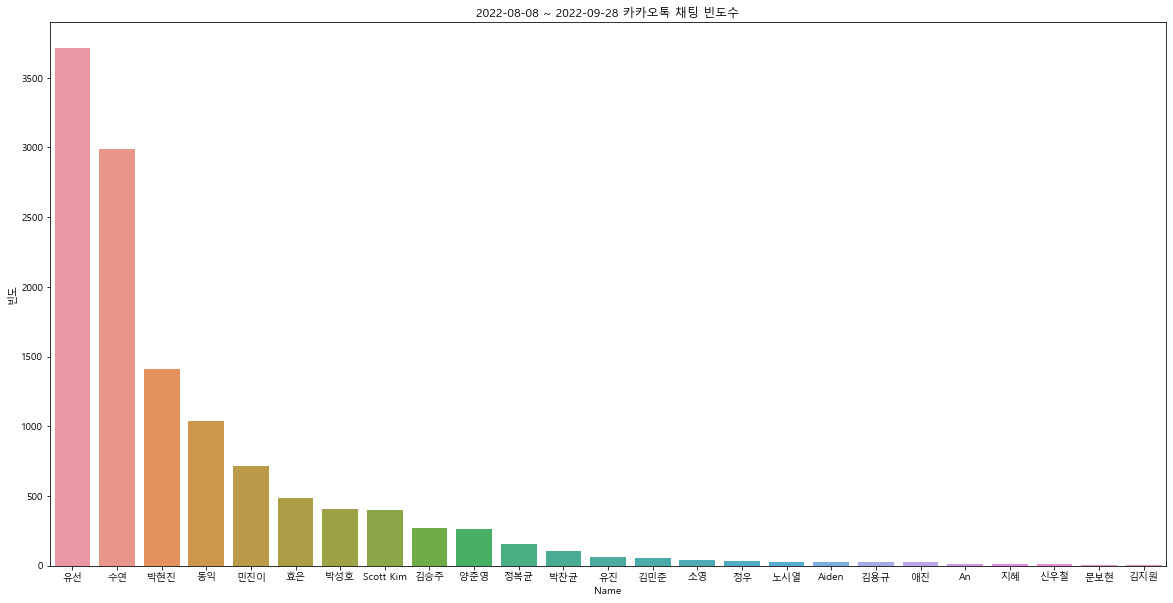

In [22]:
from matplotlib import font_manager, rc
font_path = "C:\Windows\Fonts\malgunsl.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
plt.figure(figsize=(20,10))
sns.barplot(data=dddf, x="Name",y="빈도")
plt.title('2022-08-08 ~ 2022-09-28 카카오톡 채팅 빈도수')

# 전처리 및 워드클라우드

In [23]:
# ㅋ,ㅎ 제거 안함
text = ""
 
with open("C:/Users/DS/Desktop/KakaoTalk_20220928_1338_46_357_group.txt", 'r', encoding = "utf-8") as txt :
    lines = txt.readlines()
    for line in lines[4:] :
        if '] [' in line :
            text += ( line.split('] ')[2].replace('이모티콘\n', "")
            .replace("사진\n", "").replace('삭제된 메세지입니다.\n', "").replace('ㅇ', '').replace("https://youtube.com/shorts/Rlh_ZFAyKyI?feature=share", '').replace("https://youtube.com/shorts/Ydmgah4bV98?feature=share", '').replace("http://snmfishing.com/room-h2.html14", '') )
        
#print(text)

In [24]:
# ㅋ,ㅎ 제거
text = ""
 
with open("C:/Users/DS/Desktop/KakaoTalk_20220928_1338_46_357_group.txt", 'r', encoding = "utf-8") as txt :
    lines = txt.readlines()
    for line in lines[4:] :
        if '] [' in line :
            text += ( line.split('] ')[2].replace('이모티콘\n', "")
            .replace("사진\n", "").replace('ㅋ','').replace('ㅎ','').replace('ㅠ','').replace('ㅜ','').replace('https','').replace('삭제된 메세지입니다.\n', "").replace('ㅇ', '').replace("https://youtube.com/shorts/Rlh_ZFAyKyI?feature=share", '').replace("https://youtube.com/shorts/Ydmgah4bV98?feature=share", '').replace("http://snmfishing.com/room-h2.html14", '') )
        
#print(text)

In [25]:
from wordcloud import WordCloud
 
wc = WordCloud(font_path= "C:\Windows\Fonts\malgunsl.ttf", background_color= "white", width = 600, height = 400)
wc.generate(text) # 많이 나오는 텍스트를 서칭하고 정리하는 메서드
wc.to_file("ㅋ제거.png")

In [104]:
from PIL import Image

In [135]:
mask = np.array(Image.open('C:/Users/DS/Downloads/love2.png'))
wc = WordCloud(font_path="C:\Windows\Fonts\malgunsl.ttf", background_color="white",mask=mask,width = 600, height = 400)
wc.generate(text)
wc.to_file("ㅋ제거 안함.png")